In [ ]:
from keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img,decoded)

In [1]:
from keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
from keras.layers import Input, Dense
from keras.models import Model

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img,decoded)

In [3]:
from keras.optimizers import Adam

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy,x_test))

Epoch 1/50
235/235 [==============================] - 4s 14ms/step - loss: 0.0606 - val_loss: 0.0379
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0332 - val_loss: 0.0291
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0275 - val_loss: 0.0257
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0248 - val_loss: 0.0236
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0232 - val_loss: 0.0221
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0219 - val_loss: 0.0212
Epoch 7/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0210 - val_loss: 0.0204
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0202 - val_loss: 0.0197
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0195 - val_loss: 0.0191
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0190 - val_lo

313/313 [==============================] - 2s 5ms/step - loss: 0.0153
Test Loss: 0.015259035862982273
1/1 [==============================] - 0s 44ms/step


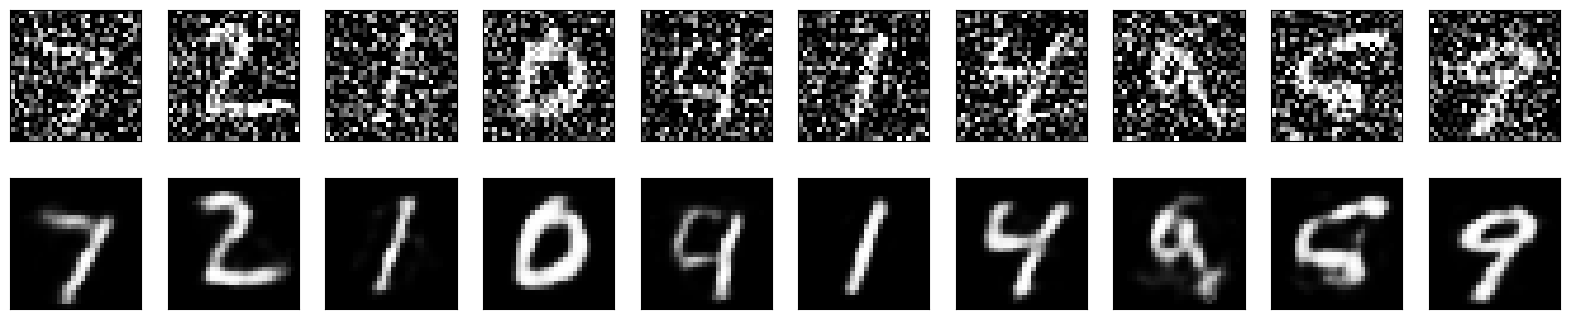

In [4]:
# Evaluate the model
evaluation = autoencoder.evaluate(x_test_noisy, x_test)
print("Test Loss:", evaluation)

# Visualize results
import matplotlib.pyplot as plt

n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    decoded_imgs = autoencoder.predict(x_test_noisy[i:i+1])
    plt.imshow(decoded_imgs.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()